### Implementation of kMeans algorithm using numpy and base Python

In [6]:
## Load libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

kMeans is one of the most popular unsupervised learning algorithms for discovering groups within data such that observations within groups are "similar" to each other. We pre-define a specific number of groups also know as `clusters`.

Objective of the kMeans algorithm is to minimize within cluster variance $WCV(C_k)$ across all `K` clusters. Within Cluster Variance is defined as how much the observations within cluster $C_k$ differ from each other.

$$ minimize \bigg\{ \sum_{k=1}^{K} WCV(C_k) \bigg\} $$

How `similar` is based on how far are the observations from each other. We generally use Euclidean Distance as the distance metric

$$ WCV(C_k) = \sum_{j=1}^{k} \sum_{i=1}^{p} (x_{i}^{(j)} - c_j)^2 $$
where `k` is the number of clusters, `n` is the number of points in the cluster `j`, $c_{j}$ is the centroid for cluster `j`.

#### kMeans Algorithm:
1. Randomly assign clusters centres based on no of clusters `k`
2. Repeat this process until the clusters centres stops changing
    1. Assign points to the cluster centre based on the distance metric
    2. Compute the cluster centre 

In [7]:
class KMeans:
    def __init__(self, k):
        self.k = k
    
    def fit(self,X):
        ## Assign random cluster centres 
        centers = X[np.random.randint(0,X.shape[0],self.k)]
        distances = np.zeros((X.shape[0],self.k))
        labels = np.zeros(X.shape[0])
        while True:
            ## Calculate distance
            for i in range(self.k):
                distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
            
            ## Assign labels based on the distance
            labels = np.argmin(distances, axis = 1)
            
            ## Find modified centres
            centers_new = [X[labels == i].mean(0) for i in range(self.k)]
            center_new = np.array(centers_new)
            
            diff = np.linalg.norm(centers_new - centers)
            if diff == 0:
                break
            centers = center_new
        return labels, centers

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [9]:
kmeans = KMeans(k = 3)
labels, centers = kmeans.fit(X[:,0:2])

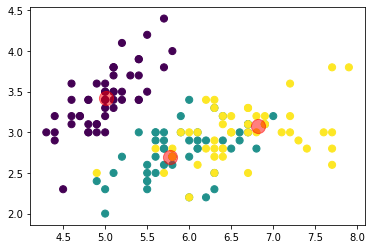

In [10]:
### Plot clusters
plt.scatter(x = X[:,0], y = X[:,1],c = y, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)
plt.show()

### Reference
* [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL)
* [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)